# SI 618 Homework #4

## Taylor Swift songs

Last updated 2023-10-04

The dataset for this assignment is from https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data.

**NOTE**: Use the dataset from Canvas rather than the dataset from Kaggle, which is updated frequently and may change while you are completing this assignment.

This dataset consist of data from Spotify's API on all albums listed on Spotify for Taylor Swift. I set up the dataset to update monthly so that if any albums get added it will get added to the dataset too. At first it may look like there are song duplicates but I checked and all song IDs are unique.

The columns in this dataset are:

name - the name of the song

album - the name of the album

release_date - the day month and year the album was released

track number - the order the song appears on the album

id - the Spotify id for the song

uri - the Spotify uri for the song

acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

speechiness - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

popularity - the popularity of the song from 0 to 100

duration_ms - The duration of the track in milliseconds.

We are going to refer to the tracks' properties of danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, and valence as "features" of the tracks.



Each of the questions is worth the same number of points, except for the final bonus question, which is worth up to an additional 2 points (out of 100).  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

Be sure to include interpretations of your results for each question.

In [12]:
import warnings
warnings.filterwarnings('ignore')

MY_UNIQNAME = 'sudhagar'  # replace this with your uniqname

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind

In [5]:
taylor_df=pd.read_csv('taylor_swift_spotify.csv')
print(taylor_df.shape)
taylor_df.head(5)


(1265, 18)


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.2040,0.735,0.444,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,77,202395
1,1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.0593,0.658,0.378,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,76,218270
2,2,Anti-Hero,Midnights (3am Edition),2022-10-22,3,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.1330,0.638,0.634,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,77,200690
3,3,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),2022-10-22,4,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.7350,0.659,0.323,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,74,256124
4,4,"You're On Your Own, Kid",Midnights (3am Edition),2022-10-22,5,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.4160,0.694,0.380,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,76,194206


Q1: Show the distribution of the popularity of the songs.  Then exclude the songs that are from karaoke albums (i.e., the album name contains "karaoke").  Show the distribution of the popularity of the songs.  What is the difference between the two distributions?

In [6]:
taylor_df.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000
mean,632.000000,10.536759,0.321938,0.593117,0.563992,0.090735,0.162244,-7.911692,0.113597,120.876979,0.414598,41.543083,230381.618182
std,365.318354,7.245936,0.342390,0.111157,0.201305,0.235631,0.121155,3.184218,0.232660,30.248042,0.203684,23.161819,59389.217176
min,0.000000,1.000000,0.000025,0.175000,0.063900,0.000000,0.029100,-17.932000,0.023100,47.607000,0.037400,0.000000,41769.000000
25%,316.000000,5.000000,0.020200,0.529000,0.398000,0.000000,0.099600,-10.147000,0.030200,95.997000,0.236000,23.000000,208986.000000
50%,632.000000,10.000000,0.151000,0.599000,0.579000,0.000005,0.119000,-7.369000,0.036300,118.984000,0.412000,42.000000,233626.000000
75%,948.000000,14.000000,0.686000,0.662000,0.729000,0.000898,0.178000,-5.572000,0.055300,141.950000,0.551000,61.000000,256053.000000
max,1264.000000,46.000000,0.983000,0.897000,0.950000,0.918000,0.931000,-1.953000,0.957000,208.918000,0.966000,94.000000,613026.000000


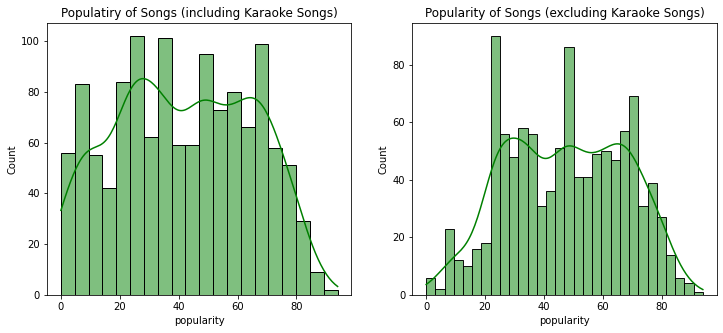

<Figure size 432x288 with 0 Axes>

In [11]:
# x=
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(taylor_df.popularity, bins=20, kde=True, color='green')
plt.title('Populatiry of Songs (including Karaoke Songs)')

taylor=taylor_df[~taylor_df.album.str.contains("Karaoke")]

plt.subplot(1,2,2)
sns.histplot(taylor.popularity, bins=30, kde=True, color='green')
plt.title('Popularity of Songs (excluding Karaoke Songs)')

plt.show()
plt.tight_layout()

### <span style="color:red"> Question 1 Interpretation - </span>
* The majority of Karaoke songs fell within the popularity range of 0-23, and the removal of Karaoke songs had the most pronounced impact on bars in this particular range.

### <font color='magenta'>IMPORTANT NOTE: the remainder of the questions are based on the songs that are NOT from karaoke albums.</font>

Q2: Report the average track duration for each album.  You answer should be in mm:ss (minutes:seconds) format rather than the milliseconds that are reported in the original dataset.

In [14]:
taylor['duration_ms']
album_df=taylor.groupby('album')['duration_ms'].mean().round().astype(int).reset_index()

In [16]:
# album_df
album_df['mean_track_duration'] = pd.to_timedelta(album_df['duration_ms'], unit='ms')
album_df['mean_track_duration'] = album_df['mean_track_duration'].apply(lambda x: '{:02}:{:02}'.format(x.seconds//60, x.seconds%60))

album_df
# Display the result
album_df[['album','mean_track_duration']].sort_values('mean_track_duration',ascending=False)

,album,mean_track_duration
24,Speak Now World Tour Live,04:57
23,Speak Now (US Version),04:47
18,Speak Now,04:47
22,Speak Now (Japanese Version),04:46
21,Speak Now (Deluxe Package),04:35
20,Speak Now (Deluxe Edition),04:35
17,Red (Taylor's Version),04:21
7,Fearless (Platinum Edition),04:10
9,Fearless Platinum Edition,04:10
16,Red (Deluxe Edition),04:06


### <span style="color:red"> Question 2 Interpretation - </span>

* Speak now has been the album with the highest mean track duration out of all of Taylor Swift's albums which is also just under 5 minutes. The album with lowest mean track duration has been the Big Machine Radio Release Special album.

Q3: Show a heatmap of the correlations between the features.  Use a diverging colormap with white in the middle (i.e. white at a correlation of 0.0).

In [17]:
taylor_num=taylor.loc[:,taylor.dtypes!=object]

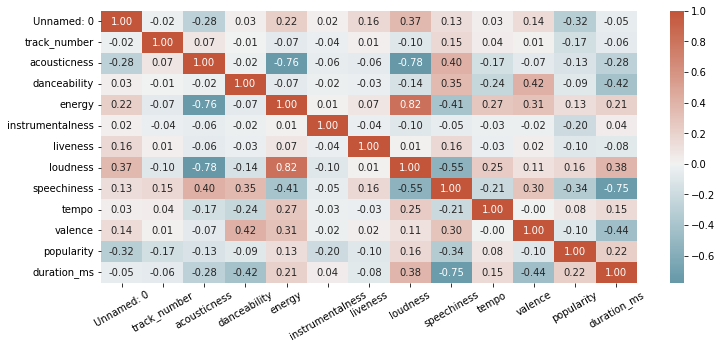

In [40]:
plt.figure(figsize=(12, 5))
corr_mat = taylor_num.corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap=cmap, center=0)
plt.xticks(rotation=30)
plt.show()

### <span style="color:red"> Question 3 Interpretation - </span>

* Positive Correlations (Color Gradient on One Side): In the heatmap, the areas with positive correlations are indicated by a color gradient that corresponds to the strength of the positive correlation. The darker the color, the stronger the positive correlation between those features.

    * For Example - Correlation between **valence** and **danceability**, **speechness** and **danceability** etc<br><br>

* Negative Correlations (Color Gradient on the Other Side): Conversely, the areas with negative correlations are indicated by a different color gradient. Here, the darker the color, the stronger the negative correlation between those features.

    * For Example - Correlation between **loudness** and **acousticness**, **speechness** and **duration_ms** etc<br><br>

* White (Correlation of 0.0): The color white in the center represents a correlation of 0.0, meaning there is no linear relationship between those features.

    * For Example - Correlation between **liveness** and **loudness**, though it is 0.01 which is not exactly 0 but close to 0.<br><br>

Q4: List the top 5 correlations between the features of the songs.

In [24]:
t = taylor_num.corr()
t = t.stack().reset_index()
t.columns = ['var1','var2','corr']
t = t[t['var1'] != t['var2']]
t = t.sort_values('corr', ascending=False, key=abs)
t = t.reset_index(drop=True)
t = t.iloc[::2]
t.head(5)

,var1,var2,corr
0,loudness,energy,0.817729
2,loudness,acousticness,-0.777471
4,energy,acousticness,-0.756873
6,duration_ms,speechiness,-0.747227
8,loudness,speechiness,-0.549766


### <span style="color:red"> Question 4 Interpretation - </span>

**Loudness and Energy (Correlation: 0.817729):**

* The strong positive correlation between loudness and energy suggests that Taylor Swift's songs with higher energy tend to have higher loudness. This indicates that her more energetic songs are also generally louder, which may reflect an upbeat and lively style in her music.

**Loudness and Acousticness (Correlation: -0.777471):**

* There is a strong negative correlation between loudness and acousticness. This implies that Taylor Swift's songs that are more acoustic (less use of electronic instruments) tend to have higher loudness. In other words, her acoustic songs are generally quieter.

**Energy and Acousticness (Correlation: -0.756873):**

* Energy and acousticness also exhibit a strong negative correlation. This means that songs with higher energy levels are less likely to be acoustic. In Taylor Swift's case, her more energetic songs tend to be less acoustic, possibly indicating a preference for electric and lively instrumentation in those songs.

**Duration and Speechiness (Correlation: -0.747227):**

* There is a strong negative correlation between the duration of the songs and their speechiness. This suggests that Taylor Swift's songs with longer durations are less speech-like, indicating that she tends to have more instrumental or musical segments in longer songs.

**Loudness and Speechiness (Correlation: -0.549766):**

* A moderate negative correlation exists between loudness and speechiness. This implies that songs with higher loudness tend to be less speech-like. In Taylor Swift's songs, those that are louder may have fewer spoken or heavily emphasized vocal parts.

Q5: Does the position of the track on the album (i.e. track number) have an effect on the popularity of the song?  Use both visual and statistical evidence to support your answer.

In [25]:
model1=smf.ols('popularity ~ track_number', data=taylor).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     33.51
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           9.28e-09
Time:                        00:56:27   Log-Likelihood:                -4732.3
No. Observations:                1075   AIC:                             9469.
Df Residuals:                    1073   BIC:                             9479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       52.3687      1.066     49.111      0.000      50.276      54.461
track_number    -0.4624      0.080     -5.789      0.000      -0.619      -0.306
==============================================================================
Omnibus:                      115.980   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.834
Skew:                          -0.106   Prob(JB):                     2.73e-08
Kurtosis:                       2.144   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
pop_track=pd.DataFrame(taylor.groupby('track_number')['popularity'].mean())
pop_track.reset_index(inplace=True)

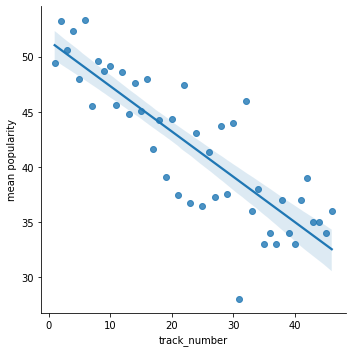

In [30]:
#Visual Evidence
ax=sns.lmplot(data=pop_track, x='track_number', y='popularity')
ax.set_ylabels('mean popularity')

### <span style="color:red"> Question 5 Interpretation - </span>

* **Indeed**, the statistical test demonstrates a noteworthy inverse relationship between the popularity of a song and its track number within the album. This negative coefficient signifies that as the track number increases, the song's popularity decreases. The associated p-value for this finding is 0.00, which is less than the significance threshold of 0.05, indicating the statistical significance of this inverse association.

* In a separate observation, the visual scatter plot, which compares the mean popularity of songs sharing the same track number against their respective track numbers, unmistakably illustrates the decline in popularity as the track number rises.

Q6: Are popular songs more danceable?
Divide the songs into popular (i.e. those with a popularity rating of 60 or higher) and less popular (i.e. those with a popularity rating of less than 60).
Conduct an ANOVA test for the two groups of data based on danceability feature. Are they statistically significant?

In [31]:
taylor['popular_cat']=pd.cut(taylor['popularity'],bins=[0,60,float('inf')],labels=['less popular','popular'])

In [32]:
taylor_lm = smf.ols('danceability ~ popular_cat', data=taylor).fit()
table = sm.stats.anova_lm(taylor_lm, typ=2) # Type 2 ANOVA DataFrame: no interaction effect
table

,sum_sq,df,F,PR(>F)
popular_cat,0.033725,1.0,2.668959,0.102618
Residual,13.482790,1067.0,NaN,NaN


In [33]:
taylor_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.669
Date:                Thu, 12 Oct 2023   Prob (F-statistic):              0.103
Time:                        00:58:04   Log-Likelihood:                 820.56
No. Observations:                1069   AIC:                            -1637.
Df Residuals:                    1067   BIC:                            -1627.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.5975      0.004    144.094      0.000       0.589       0.606
popular_cat[T.popular]    -0.0121      0.007     -1.634      0.103      -0.027       0.002
==============================================================================
Omnibus:                       17.222   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.677
Skew:                          -0.296   Prob(JB):                     0.000145
Kurtosis:                       3.216   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style="color:red"> Question 6 Interpretation - </span>

* The Anova test results indicate a p-value of 0.1, which is greater than 0.05. Therefore, we cannot reject the null hypothesis, suggesting that there is no significant relationship between song popularity and danceability. This finding contradicts the common perception that more danceable songs are generally more popular.

Q7: Create a regression model with "popularity" as the dependent variable and "liveness" as the predictor variable.
Report the following:
1. Coefficient of determination (i.e. $r^2$)
2. Whether the regression is statistically significant
3. An estimate for the value of "popularity" when the value of "liveness" is 0.22.

In [34]:
X=np.array(taylor['liveness']).reshape(-1,1)
y=np.array(taylor['popularity']).reshape(-1,1)

linreg=LinearRegression()

linreg.fit(X,y)
print(f"The R2 or the coefficient of determinaion is: {linreg.score(X, y)}")

The R2 or the coefficient of determinaion is: 0.00934790425683385


In [35]:
# Checking if the regression is significant
taylor_pop_lm = smf.ols('popularity ~ liveness', data=taylor).fit()
taylor_pop_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     10.12
Date:                Thu, 12 Oct 2023   Prob (F-statistic):            0.00150
Time:                        00:58:12   Log-Likelihood:                -4743.8
No. Observations:                1075   AIC:                             9492.
Df Residuals:                    1073   BIC:                             9502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.8667      1.017     49.048      0.000      47.872      51.862
liveness     -16.1986      5.091     -3.182      0.002     -26.188      -6.210
==============================================================================
Omnibus:                      183.152   Durbin-Watson:                   0.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.318
Skew:                          -0.056   Prob(JB):                     1.07e-09
Kurtosis:                       2.046   Cond. No.                         8.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Estimate "popularity" when "liveness" is 0.22
liveness_value = 0.22
popularity_estimate = linreg.predict(np.array([[liveness_value]])).item()

print(f"The estimate for popularity when liveness = 0.22 is: {popularity_estimate}")

The estimate for popularity when liveness = 0.22 is: 46.30295598962271


### <span style="color:red"> Question 7 Interpretation - </span>

* The linear regression analysis between Popularity and liveness as a predictor yielded an R-squared value of 0.009, indicating a relatively low explanatory power. However, the statistical significance test shows that the p-value is less than 0.05, suggesting that liveness does have a discernible impact on a song's popularity. Nevertheless, it's important to note that liveness alone cannot account for the entirety of a song's popularity.

* In summary, liveness exerts a statistically significant influence on popularity (p-value < 0.05), but other factors also contribute to a song's popularity, as evidenced by the modest R-squared value of 0.009.

* When liveness is set at 0.22, the linear regression model predicts a popularity estimate of 46.3.

Q8: Due to intellectual property conflicts, Taylor Swift re-recorded some of her earlier albums, including `Fearless` and `Red`.  We assume that re-recording her early albums will allow Taylor Swift to reclaim her artistry control, revisit the songs and make any changes she wants. Therefore, we want to see whether the new songs are more loved by the audiences by looking at the popularity score. 

* The re-recorded ones have `(Taylor’s version)` at the end of the album name.

a) Create a visualization that shows the distribution of popularity scores of original vs. re-recorded songs.  There are multiple visualizations that would be appropriate here.  You can choose any of them.  At a minimum, you should create one visualization.  Creating additional ones can earn you additional points.

b) Is there a statistically significant difference between the popularity scores of the original and re-recorded songs?  If so, which one is more popular?  How much more popular is it, on average?

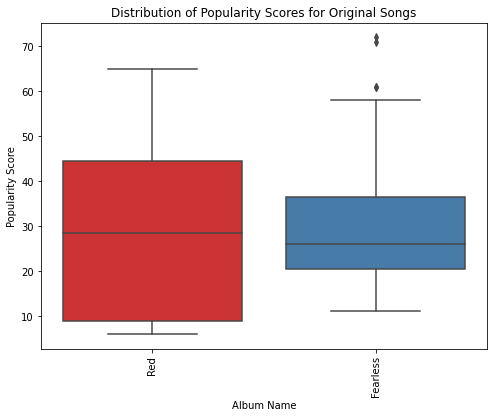

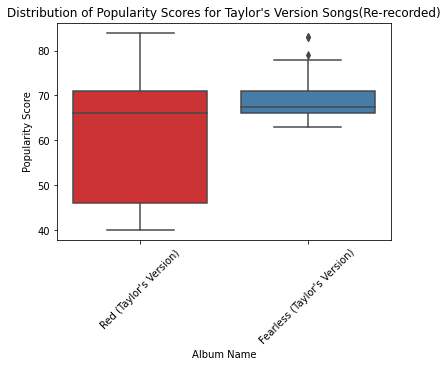

In [44]:
df_recorded=taylor[taylor['album'].str.contains("(Taylor's Version)")]
df_original=taylor[~taylor['album'].str.contains("(Taylor's Version)")]
df_red_fearless = taylor[taylor['album'].isin(["Red", "Fearless"])]

# Create a box plot for the popularity of original songs
plt.figure(figsize=(8, 6))
sns.boxplot(x='album', y='popularity', data=df_red_fearless, palette="Set1")
plt.title('Distribution of Popularity Scores for Original Songs')
plt.xlabel('Album Name')
plt.ylabel('Popularity Score')
plt.xticks(rotation=90)
plt.show()

# Create a box plot for the popularity of re-recorded songs (Taylor's Version)
sns.boxplot(x='album', y='popularity', data=df_recorded, palette="Set1")
plt.title('Distribution of Popularity Scores for Taylor\'s Version Songs(Re-recorded)')
plt.xlabel('Album Name')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.show()


In [270]:
# Perform a t-test to check for a significant difference in popularity scores
t_stat, p_value = ttest_ind(df_original['popularity'], df_recorded['popularity'])

# Calculate the average difference in popularity
average_difference = df_recorded['popularity'].mean() - df_original['popularity'].mean()

# Print the results
print("T-test p-value:", p_value)
print("Average Difference in Popularity:", average_difference)

T-test p-value: 8.760686477310352e-15
Average Difference in Popularity: 17.26693629929221


### <span style="color:red"> Question 8 Interpretation - </span>

* The visual representation in the box plots clearly demonstrates that the re-recorded versions of the Red and Fearless albums garnered notably higher popularity compared to the original albums.

* The statistical t-test, with a p-value well below 0.05, provides strong evidence of a significant distinction between the original and re-recorded albums. Specifically, the mean popularity difference between the re-recorded albums and the original ones is 17.27.

BONUS, worth up to 2 points: How would you determine whether [Taylor Swift has had an effect on the popularity of football](https://duckduckgo.com/?q=taylor+swift+football&atb=v314-1&ia=web)?  What data would you need?  What analysis would you perform?  What would you expect the results to be?

### <span style="color:red">Analysing Taylor's effect on popularity of football - </span>

**Data Collection:**

* Gathering Football Popularity Data: Begin by assembling historical data related to football, encompassing aspects like viewership, attendance, ticket pricing, merchandise sales, and other indicators that reflect the sport's popularity. Ensure that this dataset spans a substantial timeframe.

* Compiling Taylor Swift Events Data: Next, accumulate data concerning Taylor Swift's engagements and events, which might include concerts, album releases, endorsements, and her presence at football matches. Pay close attention to the timing and locations of these events.

* Incorporating Additional Relevant Data: Include supplementary data that pertains to potential influencers of football popularity, such as major sporting events, alterations in rules, economic circumstances, and societal trends.

**Analysis:**

* Time Series Examination: Initiate an analysis of trends in football popularity over time and superimpose significant Taylor Swift events onto the timeline. This process should assist in identifying correlations or patterns.

* Statistical Correlation Assessment: Employ statistical techniques to explore the relationship between Taylor Swift-related variables, like concert dates or album releases, and metrics of football popularity. You can calculate correlation coefficients or execute regression analyses.

* Hypothesis Testing: Craft hypotheses to test whether specific Taylor Swift events or activities have had a statistically significant impact on football popularity. Employ statistical tests to assess these hypotheses.

* Accounting for Control Variables: Take into account and control for other factors that may affect football popularity, such as major sporting events or societal shifts. Multiple regression analysis can be beneficial in this context.

**Expected Results:**

* The anticipated outcomes can vary based on the data and analytical procedures applied. Here are several potential scenarios:

* Positive Correlation: If the analysis uncovers a positive correlation between Taylor Swift events and football popularity metrics, it may suggest that her activities positively influence football popularity.

* Negative Correlation: A negative correlation might indicate that Taylor Swift's events coincide with decreased football popularity, potentially due to competition for attention.

* No Significant Effect: It's also conceivable that the analysis yields no significant impact of Taylor Swift on football popularity, implying that other factors hold greater sway.

* Indirect or Complex Effects: The analysis could unveil indirect or intricate effects where Taylor Swift's influence interacts with other factors, rendering the relationship more nuanced.

In conclusion, the analysis should offer insights into whether there is a quantifiable and statistically significant connection between Taylor Swift and football popularity. Nonetheless, establishing causation can be challenging, and it's important to consider the influence of other factors and variables affecting football's popularity.

### Submit your completed assignment in both IPYNB and HTML formats.